## MNIST Classification

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
import numpy as np

In [3]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist.data, mnist.target.astype(np.uint8)
X.shape

(70000, 784)

In [5]:
import matplotlib.pyplot as plt

In [6]:
some_digit = X.iloc[0].values
some_digit_image = some_digit.reshape(28, 28)

In [7]:
import matplotlib.pyplot as plt

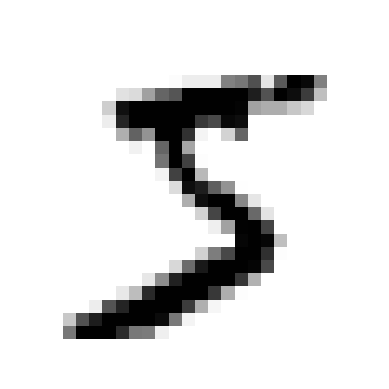

In [8]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [9]:
y[0]

5

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
sc = SGDClassifier(random_state=42)
sc.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
sc.predict([some_digit])

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
cross_val_score(sc, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [17]:
from sklearn.base import BaseEstimator

In [18]:
class NeverSClassifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [19]:
never_5_clf = NeverSClassifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [20]:
from sklearn.model_selection import cross_val_predict

In [21]:
y_train_pred = cross_val_predict(sc, X_train, y_train_5, cv=3)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [24]:
y_train_perfect_prediction = y_train_5
confusion_matrix(y_train_5, y_train_perfect_prediction)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [25]:
from sklearn.metrics import precision_score, recall_score

In [26]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [27]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [28]:
from sklearn.metrics import f1_score

In [29]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [30]:
y_scores = sc.decision_function([some_digit])
y_scores

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [31]:
threshold = 0

In [32]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [33]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [34]:
y_scores = cross_val_predict(sc, X_train, y_train_5, cv=3,
                            method='decision_function')

In [35]:
from sklearn.metrics import precision_recall_curve

In [36]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [37]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
    plt.legend()
    plt.xlabel('Precision')
    plt.grid()

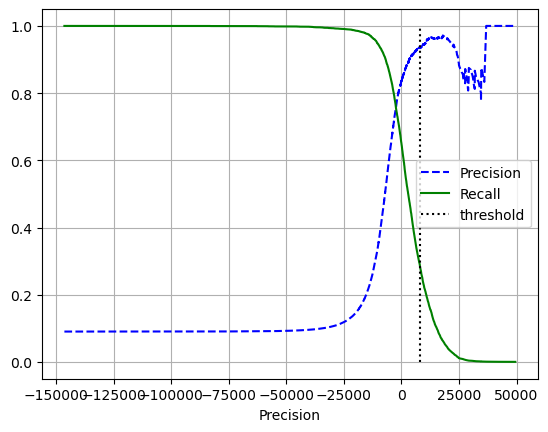

In [38]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [39]:
threshold_90_precision =thresholds[np.argmax(precisions >= 0.90)]

In [40]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [41]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [42]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## The ROC Curve

In [43]:
from sklearn.metrics import roc_curve

In [44]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [45]:
import matplotlib.patches as patches 

In [46]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    
    plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
    plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid()
    plt.axis([0, 1, 0, 1])
    plt.legend(loc="lower right", fontsize=13)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


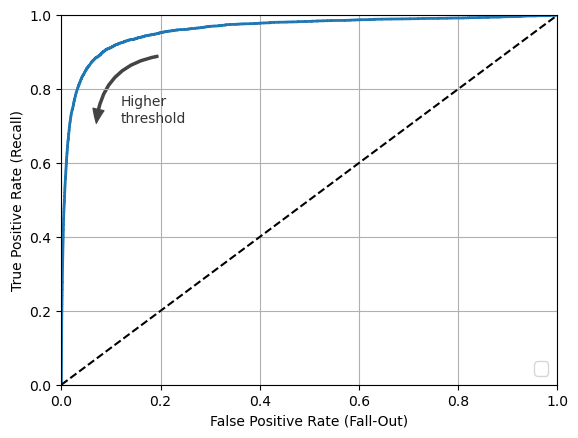

In [47]:
plot_roc_curve(fpr, tpr)
plt.show()

In [48]:
from sklearn.metrics import roc_auc_score

In [49]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(rfc, X_train, y_train_5, cv=3,
                                   method="predict_proba")

In [52]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5,
                                                     y_scores_forest)

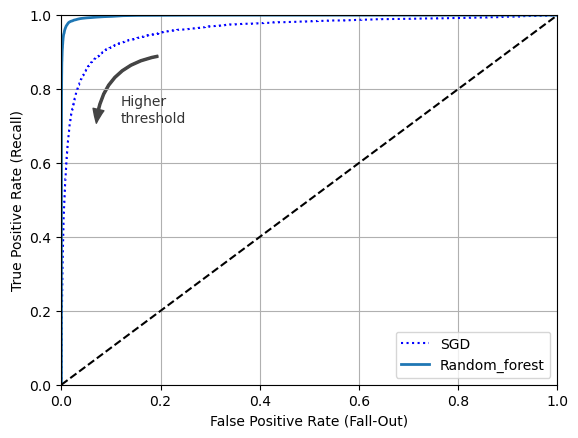

In [53]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random_forest")
plt.legend(loc="lower right")
plt.show()

In [54]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [55]:
from sklearn.svm import SVC

In [56]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [57]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [58]:
np.argmax(some_digit_scores)

5

In [59]:
svm_clf.classes_[5]

5

In [60]:
from sklearn.multiclass import OneVsRestClassifier

In [61]:
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\sklearn\base.py:465: UserWarning: X does

array([5], dtype=uint8)

In [63]:
len(ovr_clf.estimators_)

10

In [64]:
sc.fit(X_train, y_train)
sc.predict([some_digit])

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)